In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import kmapper as km
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from scipy.stats import iqr

In [2]:
df_departures = pd.read_pickle("../../calculated_distances_dep.pkl")

df_arrivals = pd.read_pickle("../../calculated_distances_arr.pkl")

print("Columns all:")
print(df_departures.columns.tolist())

Columns all:
['airportCode', 'date', 'deviation', 'delay']


In [ ]:
df_dep_by_airport_date = df_departures.groupby(["airportCode", "date"]).agg({
    'deviation': ['mean', 'median', 'std', iqr],    # 'kurtosis', 'skew'
    'delay': ['mean', 'median', 'std', iqr]     # 'kurtosis', 'skew'
}).reset_index()

df_dep_by_airport_date.columns = ['airportCode', 'date',
                              'deviation_mean', 'deviation_median', 'deviation_std', 'deviation_iqr',
                              'delay_mean', 'delay_median', 'delay_std', 'delay_iqr']

df_arr_by_airport_date = df_arrivals.groupby(["airportCode", "date"]).agg({
    'deviation': ['mean', 'median', 'std', iqr],
    'delay': ['mean', 'median', 'std', iqr]
}).reset_index()


df_arr_by_airport_date.columns = ['airportCode', 'date',
                              'deviation_mean', 'deviation_median', 'deviation_std', 'deviation_iqr',
                              'delay_mean', 'delay_median', 'delay_std', 'delay_iqr']

df_all_by_airport_date = pd.merge(df_dep_by_airport_date, df_dep_by_airport_date, on=['airportCode', 'date'], suffixes=('_dep', '_arr'))



print(df_all_by_airport_date.head())

print(df_all_by_airport_date.shape)

  airportCode       date  deviation_mean_dep  deviation_median_dep  \
0        GCFV 2018-03-25         1900.131556           1193.058225   
1        GCFV 2018-03-26         3033.928851           2318.002838   
2        GCFV 2018-03-27         2453.023916           2107.608828   
3        GCFV 2018-03-28         1590.662729           1075.893069   
4        GCFV 2018-03-29         2401.206231           1403.678309   

   deviation_std_dep  deviation_iqr_dep  delay_mean_dep  delay_median_dep  \
0        2182.850892        1423.112477       -1.818310         -1.633333   
1        2661.340071        3172.978230       -2.708039         -2.050000   
2        2124.634206        2502.391280       -1.351351         -1.266667   
3        1302.071778        1151.384768        0.998907          0.666667   
4        2651.292414        2468.406378       -1.818408         -0.600000   

   delay_std_dep  delay_iqr_dep  deviation_mean_arr  deviation_median_arr  \
0       7.746603      10.450000        

In [4]:
df_dep_by_airport_date.fillna({'deviation_std': 0.0, 'delay_std': 0.0}, inplace=True)
print(df_dep_by_airport_date.isna().sum())

print()
df_arr_by_airport_date.fillna({'deviation_std': 0.0, 'delay_std': 0.0}, inplace=True)
print(df_arr_by_airport_date.isna().sum())


print()
df_all_by_airport_date.fillna({'deviation_std_dep': 0.0, 'delay_std_dep': 0.0, 'deviation_std_arr': 0.0, 'delay_std_arr': 0.0}, inplace=True)
print(df_all_by_airport_date.isna().sum())

airportCode         0
date                0
deviation_mean      0
deviation_median    0
deviation_std       0
deviation_iqr       0
delay_mean          0
delay_median        0
delay_std           0
delay_iqr           0
dtype: int64

airportCode         0
date                0
deviation_mean      0
deviation_median    0
deviation_std       0
deviation_iqr       0
delay_mean          0
delay_median        0
delay_std           0
delay_iqr           0
dtype: int64

airportCode             0
date                    0
deviation_mean_dep      0
deviation_median_dep    0
deviation_std_dep       0
deviation_iqr_dep       0
delay_mean_dep          0
delay_median_dep        0
delay_std_dep           0
delay_iqr_dep           0
deviation_mean_arr      0
deviation_median_arr    0
deviation_std_arr       0
deviation_iqr_arr       0
delay_mean_arr          0
delay_median_arr        0
delay_std_arr           0
delay_iqr_arr           0
dtype: int64


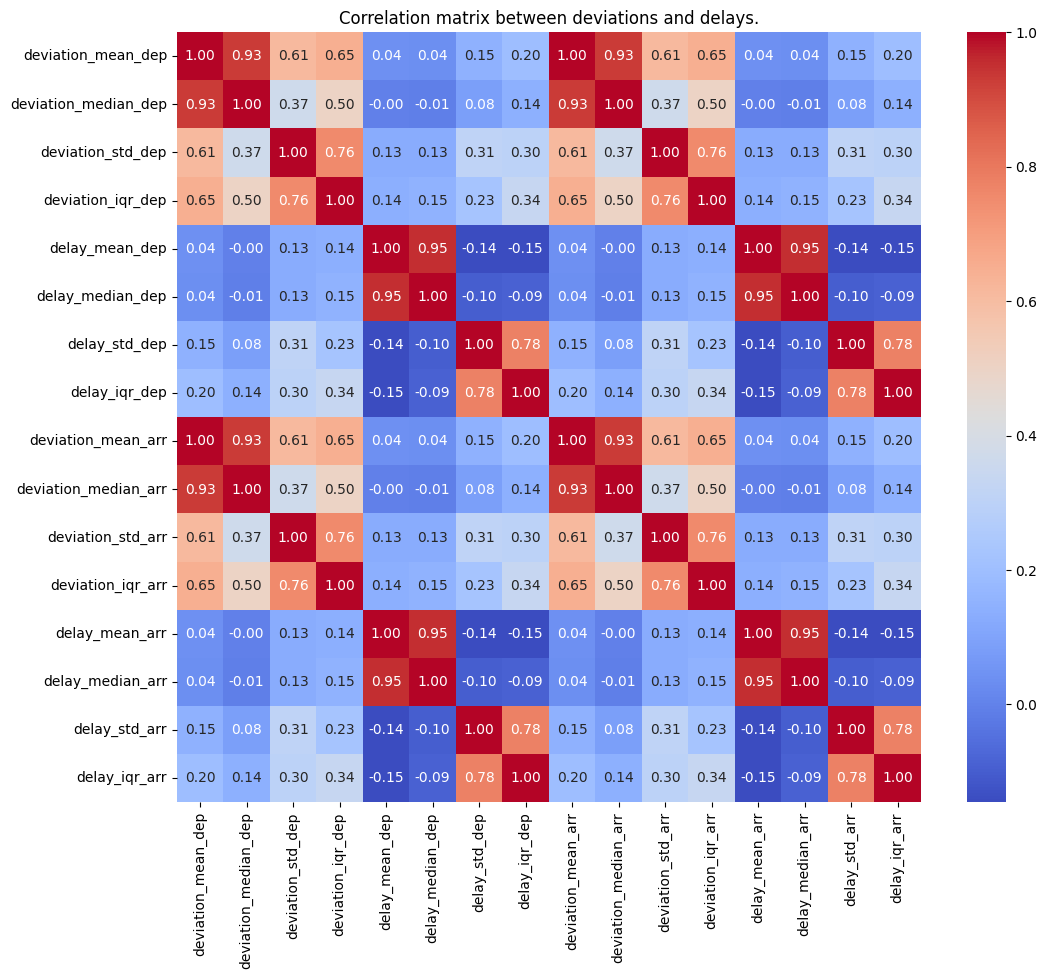

In [5]:
df_numeric = df_all_by_airport_date.drop(columns=['airportCode', 'date'])

corr_matrix = df_numeric.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation matrix between deviations and delays.")
plt.show()

In [6]:
X_dep = df_dep_by_airport_date.drop(columns=['airportCode', 'date']).dropna()

print(X_dep.head())
print()

scaler = StandardScaler()
X_scaled_dep = scaler.fit_transform(X_dep)

custom_tooltips_dep = np.array([
    f"{row['date'].strftime('%d/%m/%Y')} – {row['airportCode']}" for _, row in df_dep_by_airport_date.iterrows()
])


print(X_scaled_dep)

   deviation_mean  deviation_median  deviation_std  deviation_iqr  delay_mean  \
0     1900.131556       1193.058225    2182.850892    1423.112477   -1.818310   
1     3033.928851       2318.002838    2661.340071    3172.978230   -2.708039   
2     2453.023916       2107.608828    2124.634206    2502.391280   -1.351351   
3     1590.662729       1075.893069    1302.071778    1151.384768    0.998907   
4     2401.206231       1403.678309    2651.292414    2468.406378   -1.818408   

   delay_median  delay_std  delay_iqr  
0     -1.633333   7.746603  10.450000  
1     -2.050000   6.916201   8.800000  
2     -1.266667   5.153246   7.154167  
3      0.666667   6.167151   6.983333  
4     -0.600000   6.929220   7.975000  

[[ 8.27670435e-02 -3.05736725e-01  8.86587847e-01 ...  9.29361799e-02
   1.89339397e-01  8.60321706e-01]
 [ 1.23232069e+00  8.60971022e-01  1.40859004e+00 ...  2.75652713e-02
   3.98703880e-02  4.93117211e-01]
 [ 6.43342934e-01  6.42766215e-01  8.23077033e-01 ...  1.50462

In [7]:
X_arr = df_arr_by_airport_date.drop(columns=['airportCode', 'date']).dropna()

print(X_arr.head())
print()

scaler = StandardScaler()
X_scaled_arr = scaler.fit_transform(X_arr)

custom_tooltips_arr = np.array([
    f"{row['date'].strftime('%d/%m/%Y')} – {row['airportCode']}" for _, row in df_arr_by_airport_date.iterrows()
])

print(X_scaled_arr)


   deviation_mean  deviation_median  deviation_std  deviation_iqr  delay_mean  \
0     2993.903521       3632.367611    2521.378984    4787.346775   -3.366414   
1     3787.609523       4521.069732    2593.940146    5254.649555   -4.991473   
2     2983.859031       4026.219798    2330.350796    4682.616330   -3.924648   
3     2644.272387       2178.137927    2416.162286    4786.686885   -3.384181   
4     3145.387464       3852.684724    2700.433097    5114.674343   -4.091176   

   delay_median  delay_std  delay_iqr  
0     -3.283333   6.326659  11.112500  
1     -5.916667   7.256475  11.787500  
2     -4.883333   6.857298   9.633333  
3     -3.316667   5.687716   7.483333  
4     -4.341667   6.489131  11.191667  

[[ 1.61079295  2.51314264  1.68122769 ... -0.21104709  0.10204006
   1.39850735]
 [ 2.51006259  3.48796009  1.76831939 ... -0.5067628   0.27201508
   1.56752014]
 [ 1.59941253  2.94515915  1.45194568 ... -0.39072246  0.19904358
   1.02813983]
 ...
 [ 0.67688941  0.5882059

In [8]:
X_all = df_all_by_airport_date.drop(columns=['airportCode', 'date']).dropna()

print(X_all.head())
print()

scaler = StandardScaler()
X_scaled_all = scaler.fit_transform(X_all)

custom_tooltips_all = np.array([
    f"{row['date'].strftime('%d/%m/%Y')} – {row['airportCode']}" for _, row in df_all_by_airport_date.iterrows()
])

print(X_scaled_all)

   deviation_mean_dep  deviation_median_dep  deviation_std_dep  \
0         1900.131556           1193.058225        2182.850892   
1         3033.928851           2318.002838        2661.340071   
2         2453.023916           2107.608828        2124.634206   
3         1590.662729           1075.893069        1302.071778   
4         2401.206231           1403.678309        2651.292414   

   deviation_iqr_dep  delay_mean_dep  delay_median_dep  delay_std_dep  \
0        1423.112477       -1.818310         -1.633333       7.746603   
1        3172.978230       -2.708039         -2.050000       6.916201   
2        2502.391280       -1.351351         -1.266667       5.153246   
3        1151.384768        0.998907          0.666667       6.167151   
4        2468.406378       -1.818408         -0.600000       6.929220   

   delay_iqr_dep  deviation_mean_arr  deviation_median_arr  deviation_std_arr  \
0      10.450000         1900.131556           1193.058225        2182.850892   
1 

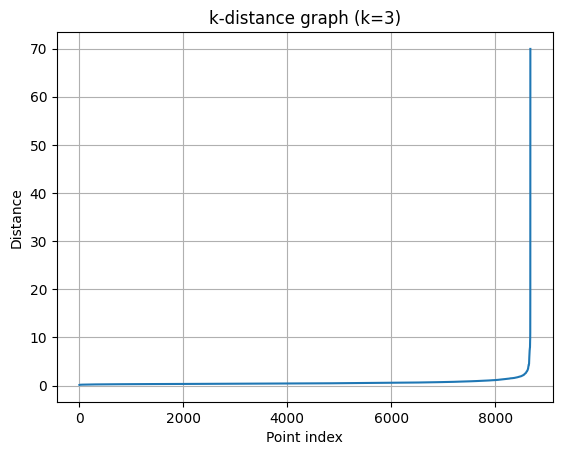

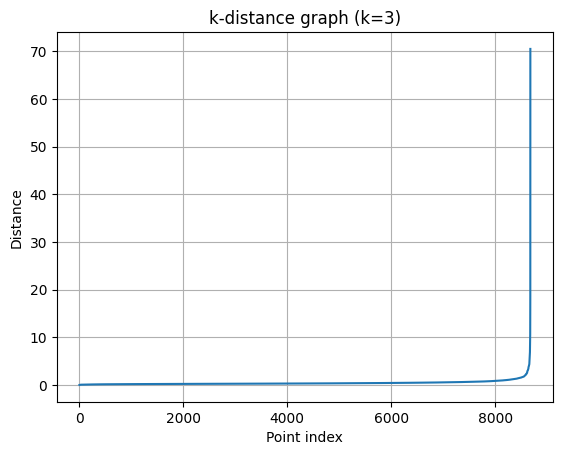

In [9]:

neighbors = NearestNeighbors(n_neighbors=3)
neighbors_fit = neighbors.fit(X_scaled_dep)
distances, indices = neighbors_fit.kneighbors(X_scaled_arr)
distances = np.sort(distances[:, 2])

plt.plot(distances)
plt.title("k-distance graph (k=3)")
plt.xlabel("Point index")
plt.ylabel("Distance")
plt.grid(True)
plt.show()

neighbors = NearestNeighbors(n_neighbors=3)
neighbors_fit = neighbors.fit(X_scaled_arr)
distances, indices = neighbors_fit.kneighbors(X_scaled_arr)
distances = np.sort(distances[:, 2])

plt.plot(distances)
plt.title("k-distance graph (k=3)")
plt.xlabel("Point index")
plt.ylabel("Distance")
plt.grid(True)
plt.show()

In [ ]:

mapper = km.KeplerMapper()

pca = PCA(n_components=3)
filter_values_dep = pca.fit_transform(X_scaled_dep)

node_color_function_dep = X_scaled_dep[:, X_dep.columns.get_loc("delay_mean")]


graph_dep = mapper.map(filter_values_dep,
                    X_scaled_dep,
                    clusterer=DBSCAN(eps=2.5, min_samples=3),
                    cover=km.Cover(n_cubes=5, perc_overlap=0.2)
)

mapper.visualize(graph_dep, 
                 path_html="mapper_output_dep.html", 
                 custom_tooltips=custom_tooltips_dep, 
                 node_color_function=node_color_function_dep)

c:\Users\Raúl\Documents\MASTER\TFM\env\lib\site-packages\kmapper\visuals.py:344: RuntimeWarning: invalid value encountered in scalar divide
  height = np.floor(((bar / max_bucket_value) * 100) + 0.5)
c:\Users\Raúl\Documents\MASTER\TFM\env\lib\site-packages\kmapper\visuals.py:345: RuntimeWarning: invalid value encountered in scalar divide
  perc = round((bar / sum_bucket_value) * 100.0, 1)


'<!DOCTYPE html>\n<html>\n\n<head>\n  <meta charset="utf-8">\n  <meta name="generator" content="KeplerMapper">\n  <title>Kepler Mapper | KeplerMapper</title>\n\n  <link rel="icon" type="image/png" href="http://i.imgur.com/axOG6GJ.jpg" />\n\n  <link href=\'https://fonts.googleapis.com/css?family=Roboto+Mono:700,300\' rel=\'stylesheet\' type=\'text/css\'>\n  <style>* {\n  margin: 0;\n  padding: 0;\n}\n\nhtml, body {\n  height: 100%;\n}\n\nbody {\n  font-family: "Roboto Mono", "Helvetica", sans-serif;\n  font-size: 14px;\n}\n\n#logo {\n  width:  85px;\n  height: 85px;\n}\n\n#display {\n  color: #95A5A6;\n  background: #212121;\n}\n\n#header {\n  background: #111111;\n}\n\n#print {\n  color: #000;\n  background: #FFF;\n}\n\nh1 {\n  font-size: 21px;\n  font-weight: 300;\n  font-weight: 300;\n}\n\nh2 {\n  font-size: 18px;\n  padding-bottom: 20px;\n  font-weight: 300;\n}\n\nh3 {\n  font-size: 14px;\n  font-weight: 700;\n  text-transform: uppercase;\n}\n\nh4 {\n  font-size: 13px;\n  font-weigh

In [ ]:
pca = PCA(n_components=3)
filter_values_arr = pca.fit_transform(X_scaled_arr)

node_color_function_arr = X_scaled_arr[:, X_arr.columns.get_loc("delay_mean")]


graph_arr = mapper.map(filter_values_arr, 
                    X_scaled_arr,  # data
                    clusterer=DBSCAN(eps=2.5, min_samples=3),
                    cover=km.Cover(n_cubes=5, perc_overlap=0.2)
)

mapper.visualize(graph_arr, 
                 path_html="mapper_output_arr.html", 
                 custom_tooltips=custom_tooltips_arr, 
                 node_color_function=node_color_function_arr)

'<!DOCTYPE html>\n<html>\n\n<head>\n  <meta charset="utf-8">\n  <meta name="generator" content="KeplerMapper">\n  <title>Kepler Mapper | KeplerMapper</title>\n\n  <link rel="icon" type="image/png" href="http://i.imgur.com/axOG6GJ.jpg" />\n\n  <link href=\'https://fonts.googleapis.com/css?family=Roboto+Mono:700,300\' rel=\'stylesheet\' type=\'text/css\'>\n  <style>* {\n  margin: 0;\n  padding: 0;\n}\n\nhtml, body {\n  height: 100%;\n}\n\nbody {\n  font-family: "Roboto Mono", "Helvetica", sans-serif;\n  font-size: 14px;\n}\n\n#logo {\n  width:  85px;\n  height: 85px;\n}\n\n#display {\n  color: #95A5A6;\n  background: #212121;\n}\n\n#header {\n  background: #111111;\n}\n\n#print {\n  color: #000;\n  background: #FFF;\n}\n\nh1 {\n  font-size: 21px;\n  font-weight: 300;\n  font-weight: 300;\n}\n\nh2 {\n  font-size: 18px;\n  padding-bottom: 20px;\n  font-weight: 300;\n}\n\nh3 {\n  font-size: 14px;\n  font-weight: 700;\n  text-transform: uppercase;\n}\n\nh4 {\n  font-size: 13px;\n  font-weigh

In [ ]:
pca = PCA(n_components=3)
filter_values_all = pca.fit_transform(X_scaled_all)

node_color_function_all = (
    0.5 * X_scaled_all[:, X_all.columns.get_loc("delay_mean_dep")] +
    0.5 * X_scaled_all[:, X_all.columns.get_loc("delay_mean_arr")]
)

graph_all = mapper.map(filter_values_all, 
                    X_scaled_all,  # data
                    clusterer=DBSCAN(eps=2.5, min_samples=3),
                    cover=km.Cover(n_cubes=5, perc_overlap=0.2)
)

mapper.visualize(graph_all, 
                 path_html="mapper_output_all.html", 
                 custom_tooltips=custom_tooltips_all,
                 node_color_function=node_color_function_all)

c:\Users\Raúl\Documents\MASTER\TFM\env\lib\site-packages\kmapper\visuals.py:344: RuntimeWarning: invalid value encountered in scalar divide
  height = np.floor(((bar / max_bucket_value) * 100) + 0.5)
c:\Users\Raúl\Documents\MASTER\TFM\env\lib\site-packages\kmapper\visuals.py:345: RuntimeWarning: invalid value encountered in scalar divide
  perc = round((bar / sum_bucket_value) * 100.0, 1)


'<!DOCTYPE html>\n<html>\n\n<head>\n  <meta charset="utf-8">\n  <meta name="generator" content="KeplerMapper">\n  <title>Kepler Mapper | KeplerMapper</title>\n\n  <link rel="icon" type="image/png" href="http://i.imgur.com/axOG6GJ.jpg" />\n\n  <link href=\'https://fonts.googleapis.com/css?family=Roboto+Mono:700,300\' rel=\'stylesheet\' type=\'text/css\'>\n  <style>* {\n  margin: 0;\n  padding: 0;\n}\n\nhtml, body {\n  height: 100%;\n}\n\nbody {\n  font-family: "Roboto Mono", "Helvetica", sans-serif;\n  font-size: 14px;\n}\n\n#logo {\n  width:  85px;\n  height: 85px;\n}\n\n#display {\n  color: #95A5A6;\n  background: #212121;\n}\n\n#header {\n  background: #111111;\n}\n\n#print {\n  color: #000;\n  background: #FFF;\n}\n\nh1 {\n  font-size: 21px;\n  font-weight: 300;\n  font-weight: 300;\n}\n\nh2 {\n  font-size: 18px;\n  padding-bottom: 20px;\n  font-weight: 300;\n}\n\nh3 {\n  font-size: 14px;\n  font-weight: 700;\n  text-transform: uppercase;\n}\n\nh4 {\n  font-size: 13px;\n  font-weigh